In [57]:
# INDIAN EV DATA

In [1]:
# importing nessesery libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [18]:
ev=pd.read_csv('indian-ev-data.csv')

In [19]:
ev.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [20]:
#exploratory data analysis

In [21]:
# Analysing the datasets

In [22]:
#shape of the dataset

In [23]:
print('ev_shape =',ev.shape)

ev_shape = (50, 11)


In [24]:
#information# checking the info (columns, datatypes, nulls) of the dataset

In [25]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB


In [26]:
ev.columns

Index(['id', 'Model', 'Manufacturer', 'Vehicle Type', 'Battery Capacity (kWh)',
       'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)',
       'Top Speed (km/h)', 'Year of Manufacture'],
      dtype='object')

In [28]:
# getting a statistical summary of the dataset

In [29]:
ev_describe=ev.describe()
ev_describe

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [30]:
value_counts = ev['Vehicle Type'].value_counts()
value_counts

Vehicle Type
Scooter    39
Bike       11
Name: count, dtype: int64

In [54]:
# Dropping rows with any null values
ev= ev.dropna()
ev.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [16]:
# VISUALIZATION

In [569]:
#COUNT PLOT (showing counts of observations in each categorical bin) 

Text(0.5, 1.0, 'counts of observations in each categorical bin ')

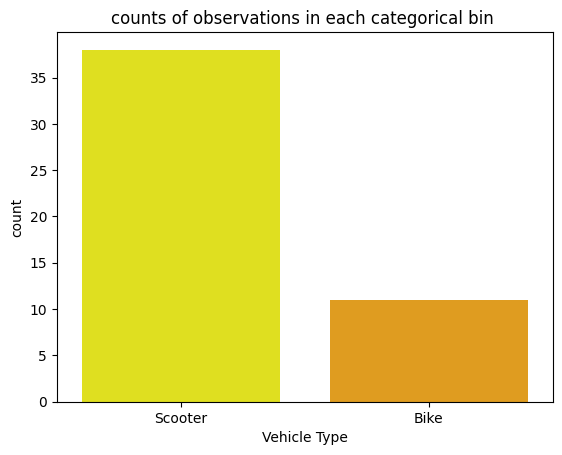

In [570]:
sns.countplot(x='Vehicle Type', data=ev,palette=['yellow','orange'])
plt.title('counts of observations in each categorical bin ')

In [196]:
#BARPLOT (relationship between vehicle types and Battery Capacity (kWh))

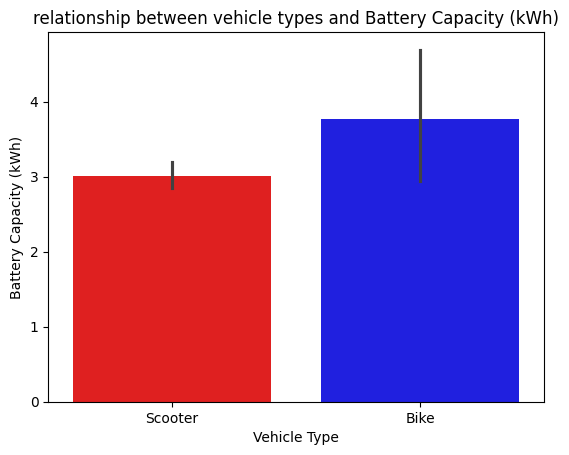

In [197]:
sns.barplot(x='Vehicle Type', y='Battery Capacity (kWh)', 
            data=ev,palette=['red', 'blue'])
plt.title('relationship between vehicle types and Battery Capacity (kWh)')
plt.show()

In [198]:
#BARPLOT (relationship between vehicle types and Price)

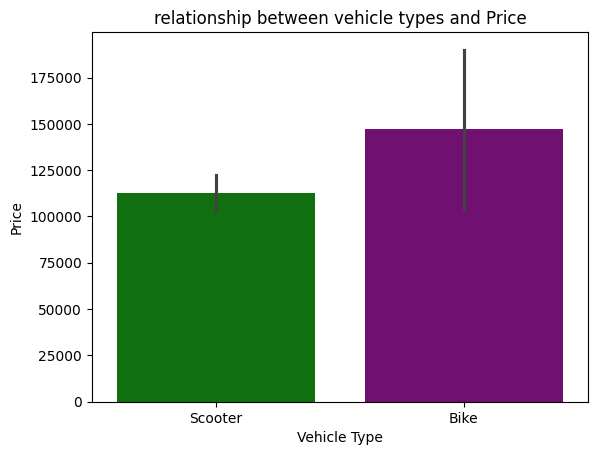

In [199]:
sns.barplot(x='Vehicle Type', y='Price', data=ev,palette=['green', 'purple'])
plt.title('relationship between vehicle types and Price')
plt.show()

In [200]:
#BARPLOT (relationship between vehicle types and Range per Charge (km))

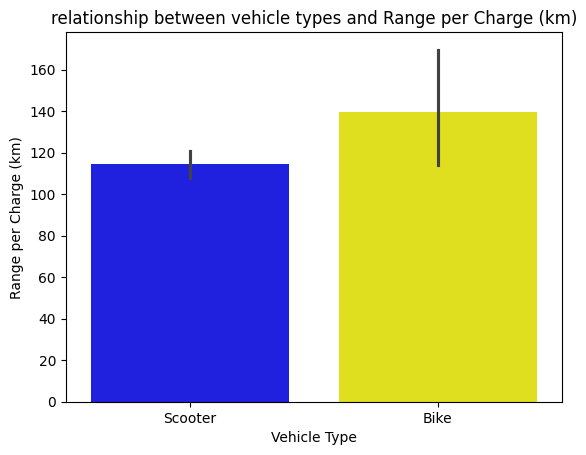

In [201]:
sns.barplot(x='Vehicle Type', y='Range per Charge (km)', data=ev,palette=['blue', 'yellow'])
plt.title('relationship between vehicle types and Range per Charge (km)')
plt.show()

In [202]:
#line plot

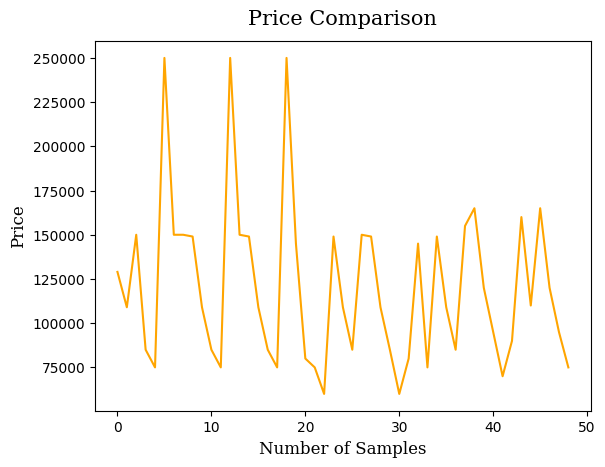

In [203]:
# plotting the price from dataset 3
plt.plot(ev['Price'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

In [60]:
EV=ev[[ 'Battery Capacity (kWh)',
       'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)',
       'Top Speed (km/h)']]


In [21]:
EV.head()

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h)
0,2.9,116,4.5,129000.0,6.0,80.0
1,2.7,120,3.0,109000.0,5.0,80.0
2,4.0,95,5.0,150000.0,4.0,60.0
3,2.5,100,3.0,85000.0,3.0,60.0
4,2.2,75,3.0,75000.0,3.0,60.0


In [63]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = EV.quantile(0.25)
Q3 = EV.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = EV[~((EV < lower_bound) | (EV > upper_bound)).any(axis=1)]
df_cleaned.head()
len(df_cleaned)

42

In [577]:
# costumizing Battery Capacity (kWh) column

In [77]:
df_cleaned['Battery Capacity (kWh)'] .mean()

2.9642857142857144

In [25]:
# Convert the 'Battery Capacity (kWh)' column to numeric
df_cleaned['Battery Capacity (kWh)'] = pd.to_numeric(df_cleaned['Battery Capacity (kWh)'])

# Defining a custom function to label the battery capacity
def label_battery_capacity(value):
    if value <= 3:
        return 'battery <3'
    else:
        return 'battery >3'

# Applying the function to the 'Battery Capacity (kWh)' column
df_cleaned['Battery Capacity (kWh)'] = df_cleaned['Battery Capacity (kWh)'].apply(label_battery_capacity)
df_cleaned.head()

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h)
0,battery <3,116,4.5,129000.0,6.0,80.0
1,battery <3,120,3.0,109000.0,5.0,80.0
2,battery >3,95,5.0,150000.0,4.0,60.0
3,battery <3,100,3.0,85000.0,3.0,60.0
4,battery <3,75,3.0,75000.0,3.0,60.0


In [29]:
df_cleaned['Battery Capacity (kWh)'].value_counts()

Battery Capacity (kWh)
battery <3    31
battery >3    11
Name: count, dtype: int64

In [30]:
# costumizing power column"

In [47]:
df_cleaned['Power (HP or kW)'].mean()

4.214285714285714

In [32]:
# Ensure the 'Power (HP or kW)' column is numeric, converting any non-numeric values to NaN
df_cleaned['Power (HP or kW)'] = pd.to_numeric(df_cleaned['Power (HP or kW)'])

# Defining a custom function to label the power
def label_power(value):
    if value <= 4:
        return 'HP<=4'
    else:
        return 'HP>4'

# Applying the function to the 'Power (HP or kW)' column
df_cleaned['Power (HP or kW)'] = df_cleaned['Power (HP or kW)'].apply(label_power)

# Check the result
print(df_cleaned['Power (HP or kW)'].head())

0     HP>4
1     HP>4
2    HP<=4
3    HP<=4
4    HP<=4
Name: Power (HP or kW), dtype: object


In [35]:
## costumizing Charging Time

In [34]:
df_cleaned['Charging Time'].mean()

3.642857142857143

In [36]:
# Defining a custom function to label the Charging Time
def label_charging_time(value):
    if value <= 4:
        return 'charge_time<4'
    else:
        return 'charge_time>4'

In [37]:
# Applying the function to the 'Power (HP or kW)' column
df_cleaned['Charging Time'] = df_cleaned['Charging Time'].apply(label_charging_time)

In [38]:
df_cleaned['Charging Time'].value_counts()

Charging Time
charge_time<4    29
charge_time>4    13
Name: count, dtype: int64

In [39]:
df_cleaned['Vehicle Type']=ev['Vehicle Type']
df_cleaned.head()

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Vehicle Type
0,battery <3,116,charge_time>4,129000.0,HP>4,80.0,Scooter
1,battery <3,120,charge_time<4,109000.0,HP>4,80.0,Scooter
2,battery >3,95,charge_time>4,150000.0,HP<=4,60.0,Scooter
3,battery <3,100,charge_time<4,85000.0,HP<=4,60.0,Scooter
4,battery <3,75,charge_time<4,75000.0,HP<=4,60.0,Scooter


In [40]:
# coustumizing range_per_charge column

In [41]:
print(df_cleaned['Range per Charge (km)'].mean())

111.61904761904762


In [42]:
# Ensure the 'Power (HP or kW)' column is numeric, converting any non-numeric values to NaN
df_cleaned['Range per Charge (km)'] = pd.to_numeric(df_cleaned['Range per Charge (km)'])

# Defining a custom function to label the power
def label_range_per_charge(value):
    if value <= 111:
        return 'Range_pc<111'
    else:
        return 'Range_pc>111'

# Applying the function to the 'Power (HP or kW)' column
df_cleaned['Range per Charge (km)'] = df_cleaned['Range per Charge (km)'].apply(label_range_per_charge)


In [43]:
df_cleaned['Range per Charge (km)'].value_counts()

Range per Charge (km)
Range_pc>111    23
Range_pc<111    19
Name: count, dtype: int64

In [45]:
# coustumizng prize column

In [44]:
df_cleaned['Price'].mean()

108285.71428571429

In [46]:
# Ensure the 'Power (HP or kW)' column is numeric, converting any non-numeric values to NaN
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'])

# Defining a custom function to label the power
def label_prize(value):
    if value <= 108285.:
        return 'price<108k'
    else:
        return 'price>108k'

# Applying the function to the 'Power (HP or kW)' column
df_cleaned['Price'] = df_cleaned['Price'].apply(label_prize)

In [47]:
df_cleaned.head()

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Vehicle Type
0,battery <3,Range_pc>111,charge_time>4,price>108k,HP>4,80.0,Scooter
1,battery <3,Range_pc>111,charge_time<4,price>108k,HP>4,80.0,Scooter
2,battery >3,Range_pc<111,charge_time>4,price>108k,HP<=4,60.0,Scooter
3,battery <3,Range_pc<111,charge_time<4,price<108k,HP<=4,60.0,Scooter
4,battery <3,Range_pc<111,charge_time<4,price<108k,HP<=4,60.0,Scooter


In [48]:
df_cleaned['Price'].value_counts()

Price
price>108k    22
price<108k    20
Name: count, dtype: int64

In [49]:
# performing # Apply one-hot encoding to all categoricalcolumns
ev_new1 = pd.get_dummies(df_cleaned, columns=['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time',
       'Price', 'Power (HP or kW)', 'Vehicle Type'], prefix=['', '','','','','']) 

In [50]:
ev_new1.columns

Index(['Top Speed (km/h)', '_battery <3', '_battery >3', '_Range_pc<111',
       '_Range_pc>111', '_charge_time<4', '_charge_time>4', '_price<108k',
       '_price>108k', '_HP<=4', '_HP>4', '_Bike', '_Scooter'],
      dtype='object')

In [51]:
new_ev=ev_new1[[ '_battery <3', '_battery >3', '_Range_pc<111',
       '_Range_pc>111', '_charge_time<4', '_charge_time>4', '_price<108k',
       '_price>108k', '_HP<=4', '_HP>4', '_Bike', '_Scooter']]

In [52]:
ev1=new_ev
ev1 = ev1.astype(int) 
print('(0/1)s of umeric matrix')
print (ev1)

(0/1)s of umeric matrix
    _battery <3  _battery >3  _Range_pc<111  _Range_pc>111  _charge_time<4  \
0             1            0              0              1               0   
1             1            0              0              1               1   
2             0            1              1              0               0   
3             1            0              1              0               1   
4             1            0              1              0               1   
7             0            1              1              0               0   
8             1            0              0              1               0   
9             1            0              0              1               1   
10            1            0              1              0               1   
11            1            0              1              0               1   
14            1            0              0              1               0   
15            1            0            

In [53]:
# step 3: Calculate the average value for each segmentation variable
average_values = ev1.mean().round(2)

# Print the average values
print("\nAverage Values for Each Segmentation Variable:\n", average_values)
type(average_values)


Average Values for Each Segmentation Variable:
 _battery <3       0.74
_battery >3       0.26
_Range_pc<111     0.45
_Range_pc>111     0.55
_charge_time<4    0.69
_charge_time>4    0.31
_price<108k       0.48
_price>108k       0.52
_HP<=4            0.57
_HP>4             0.43
_Bike             0.10
_Scooter          0.90
dtype: float64


pandas.core.series.Series

In [54]:
# Results from principal components analysis

In [58]:
 # Perform PCA
pca = PCA()
pca.fit(ev1)

# Get standard deviation, proportion of variance, and cumulative proportion
std_dev = pca.singular_values_ / np.sqrt(len(ev1))
explained_variance = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(explained_variance)

# Preparing data for display in the required format
importance_df = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_proportion
})

# Create a new DataFrame with PCs as columns
importance_df = importance_df.T
importance_df.columns = [f'PC{i+1}' for i in range(len(std_dev))]

# Display the output in the specified format
# print("Importance of Components:\n")
data_frame=pd.DataFrame(importance_df)
print(data_frame)

                             PC1       PC2       PC3       PC4       PC5  \
Standard Deviation      1.231008  0.651081  0.485015  0.386988  0.328196   
Proportion of Variance  0.613385  0.171586  0.095219  0.060619  0.043599   
Cumulative Proportion   0.613385  0.784971  0.880189  0.940808  0.984407   

                             PC6           PC7           PC8           PC9  \
Standard Deviation      0.196272  2.438949e-16  1.044727e-16  8.547227e-17   
Proportion of Variance  0.015593  2.407781e-32  4.417911e-33  2.957071e-33   
Cumulative Proportion   1.000000  1.000000e+00  1.000000e+00  1.000000e+00   

                                PC10          PC11          PC12  
Standard Deviation      5.184411e-17  1.196977e-17  7.847518e-18  
Proportion of Variance  1.087953e-33  5.799394e-35  2.492734e-35  
Cumulative Proportion   1.000000e+00  1.000000e+00  1.000000e+00  


In [59]:
 # loadings

In [60]:
# Perform PCA
pca = PCA()
pca.fit(ev1)

# Get standard deviations
std_dev = pca.singular_values_ / np.sqrt(len(ev1))

# Display standard deviations
print( ', '.join(f"{std:.1f}" for std in std_dev))

1.2, 0.7, 0.5, 0.4, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0


In [61]:
pca = PCA()
pca.fit(ev1)

# Get the components (loadings)
loadings = pca.components_.T
# Multiply the loadings by -1 to adjust signs
loadings *= -1

# Create a DataFrame for the rotation matrix
rotation_df = pd.DataFrame(loadings, index=ev1.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display the rotation matrix
print("Rotation (n x k) = (11 x 11):\n")
rotation=rotation_df
df=rotation_df
rotation_df

Rotation (n x k) = (11 x 11):



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
_battery <3,0.175083,0.479905,0.440675,0.114033,-0.073356,-0.162658,-0.593365,0.223742,-0.166067,0.241776,0.064967,0.087192
_battery >3,-0.175083,-0.479905,-0.440675,-0.114033,0.073356,0.162658,-0.593365,0.223742,-0.166067,0.241776,0.064967,0.087192
_Range_pc<111,0.355525,-0.186505,0.198246,-0.081681,0.536570,0.070263,-0.268853,-0.526454,0.353419,0.107322,0.019077,-0.117374
_Range_pc>111,-0.355525,0.186505,-0.198246,0.081681,-0.536570,-0.070263,-0.268853,-0.526454,0.353419,0.107322,0.019077,-0.117374
_charge_time<4,0.250401,0.358327,-0.505248,-0.065140,0.156106,-0.158157,-0.028635,-0.402603,-0.565751,-0.112038,0.006560,0.066492
_charge_time>4,-0.250401,-0.358327,0.505248,0.065140,-0.156106,0.158157,-0.028635,-0.402603,-0.565751,-0.112038,0.006560,0.066492
_price<108k,0.388436,0.014170,-0.056028,0.100060,-0.282747,0.505786,-0.058830,-0.010971,0.015182,0.014944,-0.691981,0.130869
_price>108k,-0.388436,-0.014170,0.056028,-0.100060,0.282747,-0.505786,-0.058830,-0.010971,0.015182,0.014944,-0.691981,0.130869
_HP<=4,0.346887,-0.326044,-0.022044,0.143988,-0.256587,-0.431635,-0.264900,0.069219,0.089100,-0.645341,0.004768,-0.024711
_HP>4,-0.346887,0.326044,0.022044,-0.143988,0.256587,0.431635,-0.264900,0.069219,0.089100,-0.645341,0.004768,-0.024711


In [113]:
#choosing the model 

In [111]:
Ev2=ev1[['_battery <3','_Range_pc>111','_charge_time<4','_price>108k','_HP<=4',
         '_Scooter']]
Ev2.head()

,_battery <3,_Range_pc>111,_charge_time<4,_price>108k,_HP<=4,_Scooter
0,1,1,0,1,0,1
1,1,1,1,1,0,1
2,0,0,0,1,1,1
3,1,0,1,0,1,1
4,1,0,1,0,1,1


In [78]:
rotation_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
_battery <3,0.175083,0.479905,0.440675,0.114033,-0.073356,-0.162658,-0.593365,0.223742,-0.166067,0.241776,0.064967,0.087192
_battery >3,-0.175083,-0.479905,-0.440675,-0.114033,0.073356,0.162658,-0.593365,0.223742,-0.166067,0.241776,0.064967,0.087192
_Range_pc<111,0.355525,-0.186505,0.198246,-0.081681,0.536570,0.070263,-0.268853,-0.526454,0.353419,0.107322,0.019077,-0.117374
_Range_pc>111,-0.355525,0.186505,-0.198246,0.081681,-0.536570,-0.070263,-0.268853,-0.526454,0.353419,0.107322,0.019077,-0.117374
_charge_time<4,0.250401,0.358327,-0.505248,-0.065140,0.156106,-0.158157,-0.028635,-0.402603,-0.565751,-0.112038,0.006560,0.066492
_charge_time>4,-0.250401,-0.358327,0.505248,0.065140,-0.156106,0.158157,-0.028635,-0.402603,-0.565751,-0.112038,0.006560,0.066492
_price<108k,0.388436,0.014170,-0.056028,0.100060,-0.282747,0.505786,-0.058830,-0.010971,0.015182,0.014944,-0.691981,0.130869
_price>108k,-0.388436,-0.014170,0.056028,-0.100060,0.282747,-0.505786,-0.058830,-0.010971,0.015182,0.014944,-0.691981,0.130869
_HP<=4,0.346887,-0.326044,-0.022044,0.143988,-0.256587,-0.431635,-0.264900,0.069219,0.089100,-0.645341,0.004768,-0.024711
_HP>4,-0.346887,0.326044,0.022044,-0.143988,0.256587,0.431635,-0.264900,0.069219,0.089100,-0.645341,0.004768,-0.024711


In [63]:
# 1.K-Means Clustering

In [75]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Ev2)
kmeans_labels

In [102]:
# Silhouette Score

In [103]:
silhouette_avg = silhouette_score(Ev2, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5608876785430924


In [104]:
# 2. Davies-Bouldin Index

In [105]:
db_score = davies_bouldin_score(Ev2, kmeans_labels)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.7830949234982834


In [71]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [106]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(Ev2)

In [107]:
silhouette_avg = silhouette_score(Ev2, dbscan_labels)
print(f"Silhouette Score: {silhouette_avg}")
db_score = davies_bouldin_score(Ev2, dbscan_labels)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.4957405143995488
Davies-Bouldin Index: 0.957793375347362


In [74]:
# Gaussian Mixture Model

In [109]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Ev2)

In [110]:
silhouette_avg = silhouette_score(Ev2, gmm_labels)
print(f"Silhouette Score: {silhouette_avg}")
db_score = davies_bouldin_score(Ev2, gmm_labels)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.5608876785430924
Davies-Bouldin Index: 0.7830949234982834


In [114]:
# number of clusters to be considered

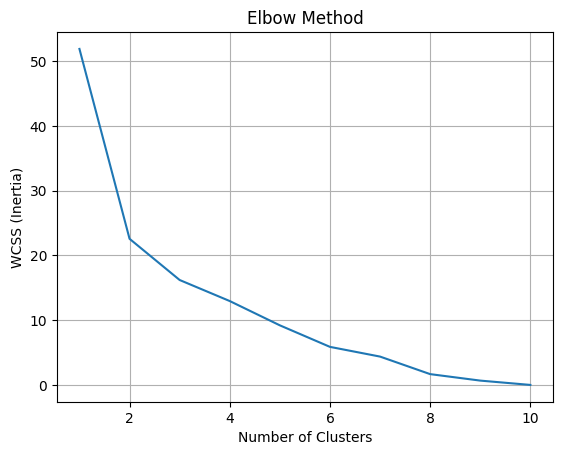

In [116]:
# List to hold the WCSS values for each number of clusters
wcss = []

# Test KMeans with different numbers of clusters
for i in range(1, 11):  # Typically you test between 1 and 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Ev2)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid()
plt.show()

In [49]:
# Segment separation plot using principal components 1 and 2

In [82]:
labels=['_battery <3','_Range_pc>111','_charge_time<4','_price>108k','_HP<=4','_Scooter']

In [83]:
pca = PCA()
pca.fit(Ev2)

# Get the components (loadings)
loadings = pca.components_.T
# Multiply the loadings by -1 to adjust signs
loadings *= -1

# Create a DataFrame for the rotation matrix
rotation_df1 = pd.DataFrame(loadings, index=Ev2.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display the rotation matrix
print("Rotation (n x k) = (11 x 11):\n")
rotation=rotation_df
df=rotation_df
rotation_df1

Rotation (n x k) = (11 x 11):



,PC1,PC2,PC3,PC4,PC5,PC6
_battery <3,0.247605,0.678689,0.623208,0.161267,-0.103741,-0.230033
_Range_pc>111,-0.502789,0.263758,-0.280363,0.115515,-0.758825,-0.099367
_charge_time<4,0.354120,0.506751,-0.714528,-0.092122,0.220767,-0.223667
_price>108k,-0.549331,-0.020039,0.079235,-0.141507,0.399865,-0.715290
_HP<=4,0.490573,-0.461096,-0.031175,0.203630,-0.362868,-0.610424
_Scooter,-0.134419,-0.002308,-0.123316,0.943755,0.270407,0.054096


In [85]:
pca_datas=pd.DataFrame()

In [50]:
# Segment separation plot using principal components 1 and 2

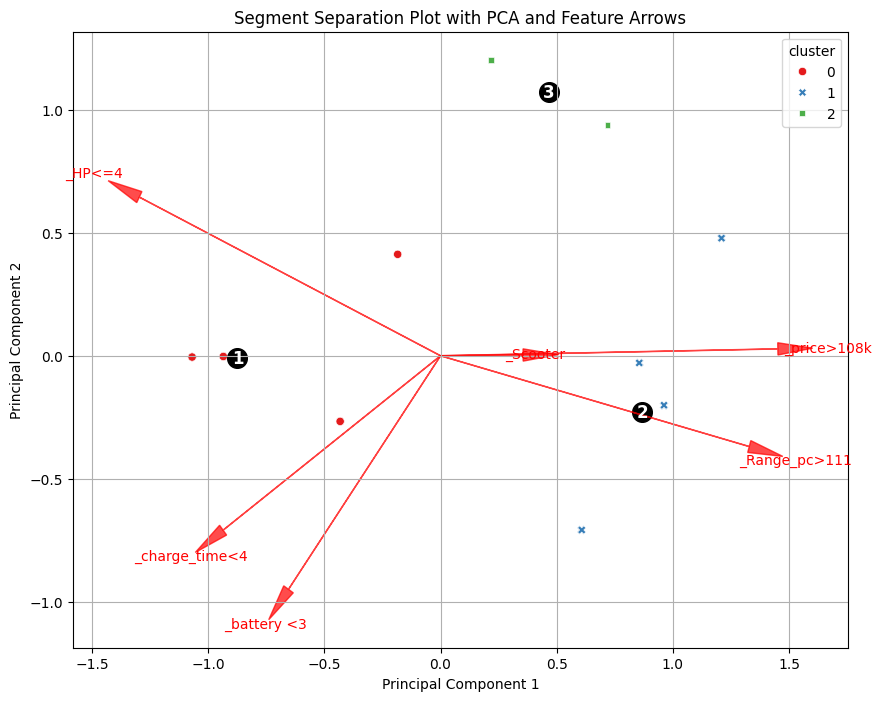

In [126]:
# Clustering into 4 segments using KMeans
X = Ev2
kmeans = KMeans(n_clusters=3, random_state=42)
pca_datas['cluster'] = kmeans.fit_predict(X)

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
pca_datas['pca1'] = pca_components[:, 0]
pca_datas['pca2'] = pca_components[:, 1]
scaling_factor = 3  # Adjust this value to make arrows larger
# Get the loadings (arrows for original features)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)* scaling_factor

# Plot PCA components and color by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_datas, palette='Set1', style='cluster')

# Plot the centers of the clusters
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], s=200, c='black', marker='o')
    plt.text(center[0], center[1], str(i + 1), fontsize=12, color='white', weight='bold',
             ha='center', va='center')

# Add arrows for the original features
features = X.columns
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.7, head_width=0.05,head_length=0.15,)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='red', ha='center', va='center')

# Add labels for the PCA axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.title('Segment Separation Plot with PCA and Feature Arrows')
plt.grid()
plt.show()